In [140]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, t, ttest_1samp, norm

Problem 1

Remember from last week we discussed that skewness and kurtosis functions in statistical packages are often biased. Is your function biased? Prove or disprove your hypothesis.

Steps
1. Sample 10, 100, 1,000, 10,000 standardized random normal values.
2. Calculate the skewness and kurtosis
3. Sample the skewness and kurtosis by repeating steps 1 and 2 100 times.
4. Calculate the p-value (μ0 = 0).
5. If the value is lower than your threshold (typically 5%), then you reject the hypothesis that the kurtosis function is unbiased.

In [175]:
def tTest(sampleNum, target): 
    times = 100

    samples = np.empty(times)
    if target == 'skewness':
        for i in range(times):
            samples[i] = skew(np.random.normal(0, 1, sampleNum))
    elif target == 'kurtosis':
        for i in range(times):
            samples[i] = kurtosis(np.random.normal(0, 1, sampleNum))

    t_stat, p_val = ttest_1samp(samples, popmean=0)

    if p_val < 0.05:
        print("{} p-value is {}.\nReject the null hypothesis.\n" .format(target, p_val))
    else:
        print("{} p-value is {}.\nFail to reject the null hypothesis.\n" .format(target, p_val))
    return

In [187]:
sample = [10, 100, 1000, 10000]

for num in sample:
    print("{} samples: " .format(num))
    tTest(num, 'skewness')
    tTest(num, 'kurtosis')

10 samples: 
skewness p-value is 0.010022125067440038.
Reject the null hypothesis.

kurtosis p-value is 9.892089260419227e-12.
Reject the null hypothesis.

100 samples: 
skewness p-value is 0.835437664512038.
Fail to reject the null hypothesis.

kurtosis p-value is 0.6467761933137416.
Fail to reject the null hypothesis.

1000 samples: 
skewness p-value is 0.0375664513602751.
Reject the null hypothesis.

kurtosis p-value is 0.9977733631042587.
Fail to reject the null hypothesis.

10000 samples: 
skewness p-value is 0.472536613094932.
Fail to reject the null hypothesis.

kurtosis p-value is 0.05100055903843119.
Fail to reject the null hypothesis.



Problem 2

2.1.1

Fit the data in problem2.csv using OLS and calculate the error vector.

In [143]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.optimize import minimize 

In [144]:
data = pd.read_csv('Project/problem2.csv')
data['ones'] = 1
x = data['x']
X = data[['ones','x']]
y = data ['y']

In [145]:
ols_model = sm.OLS(y,X).fit()
error = ols_model.resid
print(error)
ols_model.summary()

0    -0.838485
1     0.835296
2     1.027428
3     1.319711
4    -0.152317
        ...   
95   -1.590264
96   -1.694848
97    0.434878
98    0.402261
99   -0.922319
Length: 100, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     23.68
Date:                Fri, 27 Jan 2023   Prob (F-statistic):           4.34e-06
Time:                        22:13:43   Log-Likelihood:                -159.99
No. Observations:                 100   AIC:                             324.0
Df Residuals:                      98   BIC:                             329.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           0.1198      0.121      0.990      0.325      -0.120       0.360
x              0.6052      0.124      4.867      0.000       0.358       0.852
==============================================================================
Omnibus:                       14.146   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               43.673
Skew:                          -0.267   Prob(JB):                     3.28e-10
Kurtosis:                       6.193   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.1.2

Look at its distribution. How well does it fit the assumption of normally distributed errors?

The Mean of error is -5.773159728050814e-17.
The Std of error is 1.2044314159651845.
The Median of error is 0.26267113604097303.
The Skewness of error is -0.26726658552879606.
The Kurtosis of error is 3.1931010009568777.


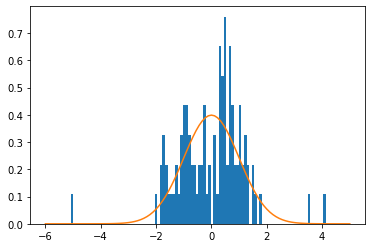

In [146]:
plt.hist(error, bins = 100, density = True)
x_axis = np.linspace(math.floor(error.min()), math.ceil(error.max()), 100)
plt.plot(x_axis, norm.pdf(x_axis, 0,1))
plt.savefig('error.png')

print("The Mean of error is {}." .format(error.mean()))
print("The Std of error is {}." .format(error.std()))
print("The Median of error is {}." .format(error.median()))
print("The Skewness of error is {}." .format(skew(error)))
print("The Kurtosis of error is {}." .format(kurtosis(error)))

2.2.1

Fit the data using MLE given the assumption of normality.

In [147]:
def MLE_Norm(parameters, x, y):
   # extract parameters
   const, beta, param3 = parameters
   # predict the output
   pred = const + beta * x
   # Calculate the negative log-likelihood for normal distribution
   neg_LL = -1 * np.sum(stats.norm.logpdf(y, pred, param3))
   return neg_LL 

mle_norm_model = minimize(MLE_Norm, np.array([1,1,1]), args=(x, y))
mle_norm_model

      fun: 159.9920966891625
 hess_inv: array([[ 1.42083109e-02, -1.06286391e-04, -6.03001775e-05],
       [-1.06286391e-04,  1.53428108e-02, -3.15255082e-04],
       [-6.03001775e-05, -3.15255082e-04,  7.44927901e-03]])
      jac: array([ 1.90734863e-06,  1.90734863e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 12
     njev: 15
   status: 0
  success: True
        x: array([0.11983619, 0.60520485, 1.19839408])

2.2.2

Then fit the MLE using the assumption of a T distribution of the errors.

In [148]:
def MLE_t(parameters, x, y):
   # extract parameters
   const, beta, param3, param4 = parameters
   # predict the output
   pred = const + beta * x
   # Calculate the negative log-likelihood for normal distribution
   neg_LL = -1 * np.sum(stats.t.logpdf(y-pred, param3, scale=param4))
   return neg_LL 

mle_t_model = minimize(MLE_t, np.array([1,1,1,1]), args=(x, y))
mle_t_model

      fun: 155.4729704124678
 hess_inv: array([[ 1.19604995e-02,  5.85932519e-04, -1.22621638e-02,
        -1.31122212e-03],
       [ 5.85932519e-04,  1.30090435e-02,  2.36871513e-02,
         2.00612055e-04],
       [-1.22621638e-02,  2.36871513e-02,  7.30889225e+00,
         1.09576180e-01],
       [-1.31122212e-03,  2.00612055e-04,  1.09576180e-01,
         8.34097836e-03]])
      jac: array([ 3.81469727e-06,  0.00000000e+00, -1.90734863e-06, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 105
      nit: 17
     njev: 21
   status: 0
  success: True
        x: array([0.14261413, 0.55757175, 6.27656343, 0.97126595])

2.2.3

Which is the best fit?

In [149]:
def R_Square(x, y, constant, beta):   
    pred = constant + beta * x
    error = y - pred
    ss_total = sum((y - np.mean(y)) ** 2)
    ss_error = sum((error - np.mean(error)) ** 2)
    r_squared = 1 - (ss_error / ss_total)
    return r_squared

In [150]:
R_Square_Norm = R_Square(x, y, mle_norm_model.x[0], mle_norm_model.x[1])
R_Square_T = R_Square(x, y, mle_t_model.x[0], mle_t_model.x[1])
print("R_Square_Norm is {}" .format(R_Square_Norm))
print("R_Square_T is {}" .format(R_Square_T))
print(R_Square_Norm - R_Square_T)

R_Square_Norm is 0.1946395239189499
R_Square_T is 0.19343381273419535
0.0012057111847545432


2.3

What are the fitted parameters of each and how do they compare? What does this tell us about the breaking of the normality assumption in regards to expected values in this case?

In [151]:
def info_criteria(n, k, L):
    AIC = 2 * k + 2 * L
    BIC = k * np.log(n) + 2 * L
    return AIC, BIC

AIC_N, BIC_N = info_criteria(len(x), 2, mle_norm_model.fun)
AIC_T, BIC_T = info_criteria(len(x), 2, mle_t_model.fun)

print("AIC_N {}, BIC_N {}, AIC_T {}, BIC_T {}" .format(AIC_N, BIC_N, AIC_T, BIC_T))

AIC_N 323.984193378325, BIC_N 329.1945337503012, AIC_T 314.9459408249356, BIC_T 320.1562811969118


Problem 3

Simulate AR(1) through AR(3) and MA(1) through MA(3) processes. Compare their ACF and PACF graphs. How do the graphs help us to identify the type and order of each process?

/Users/wangyuanzhe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/wangyuanzhe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/wangyuanzhe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn

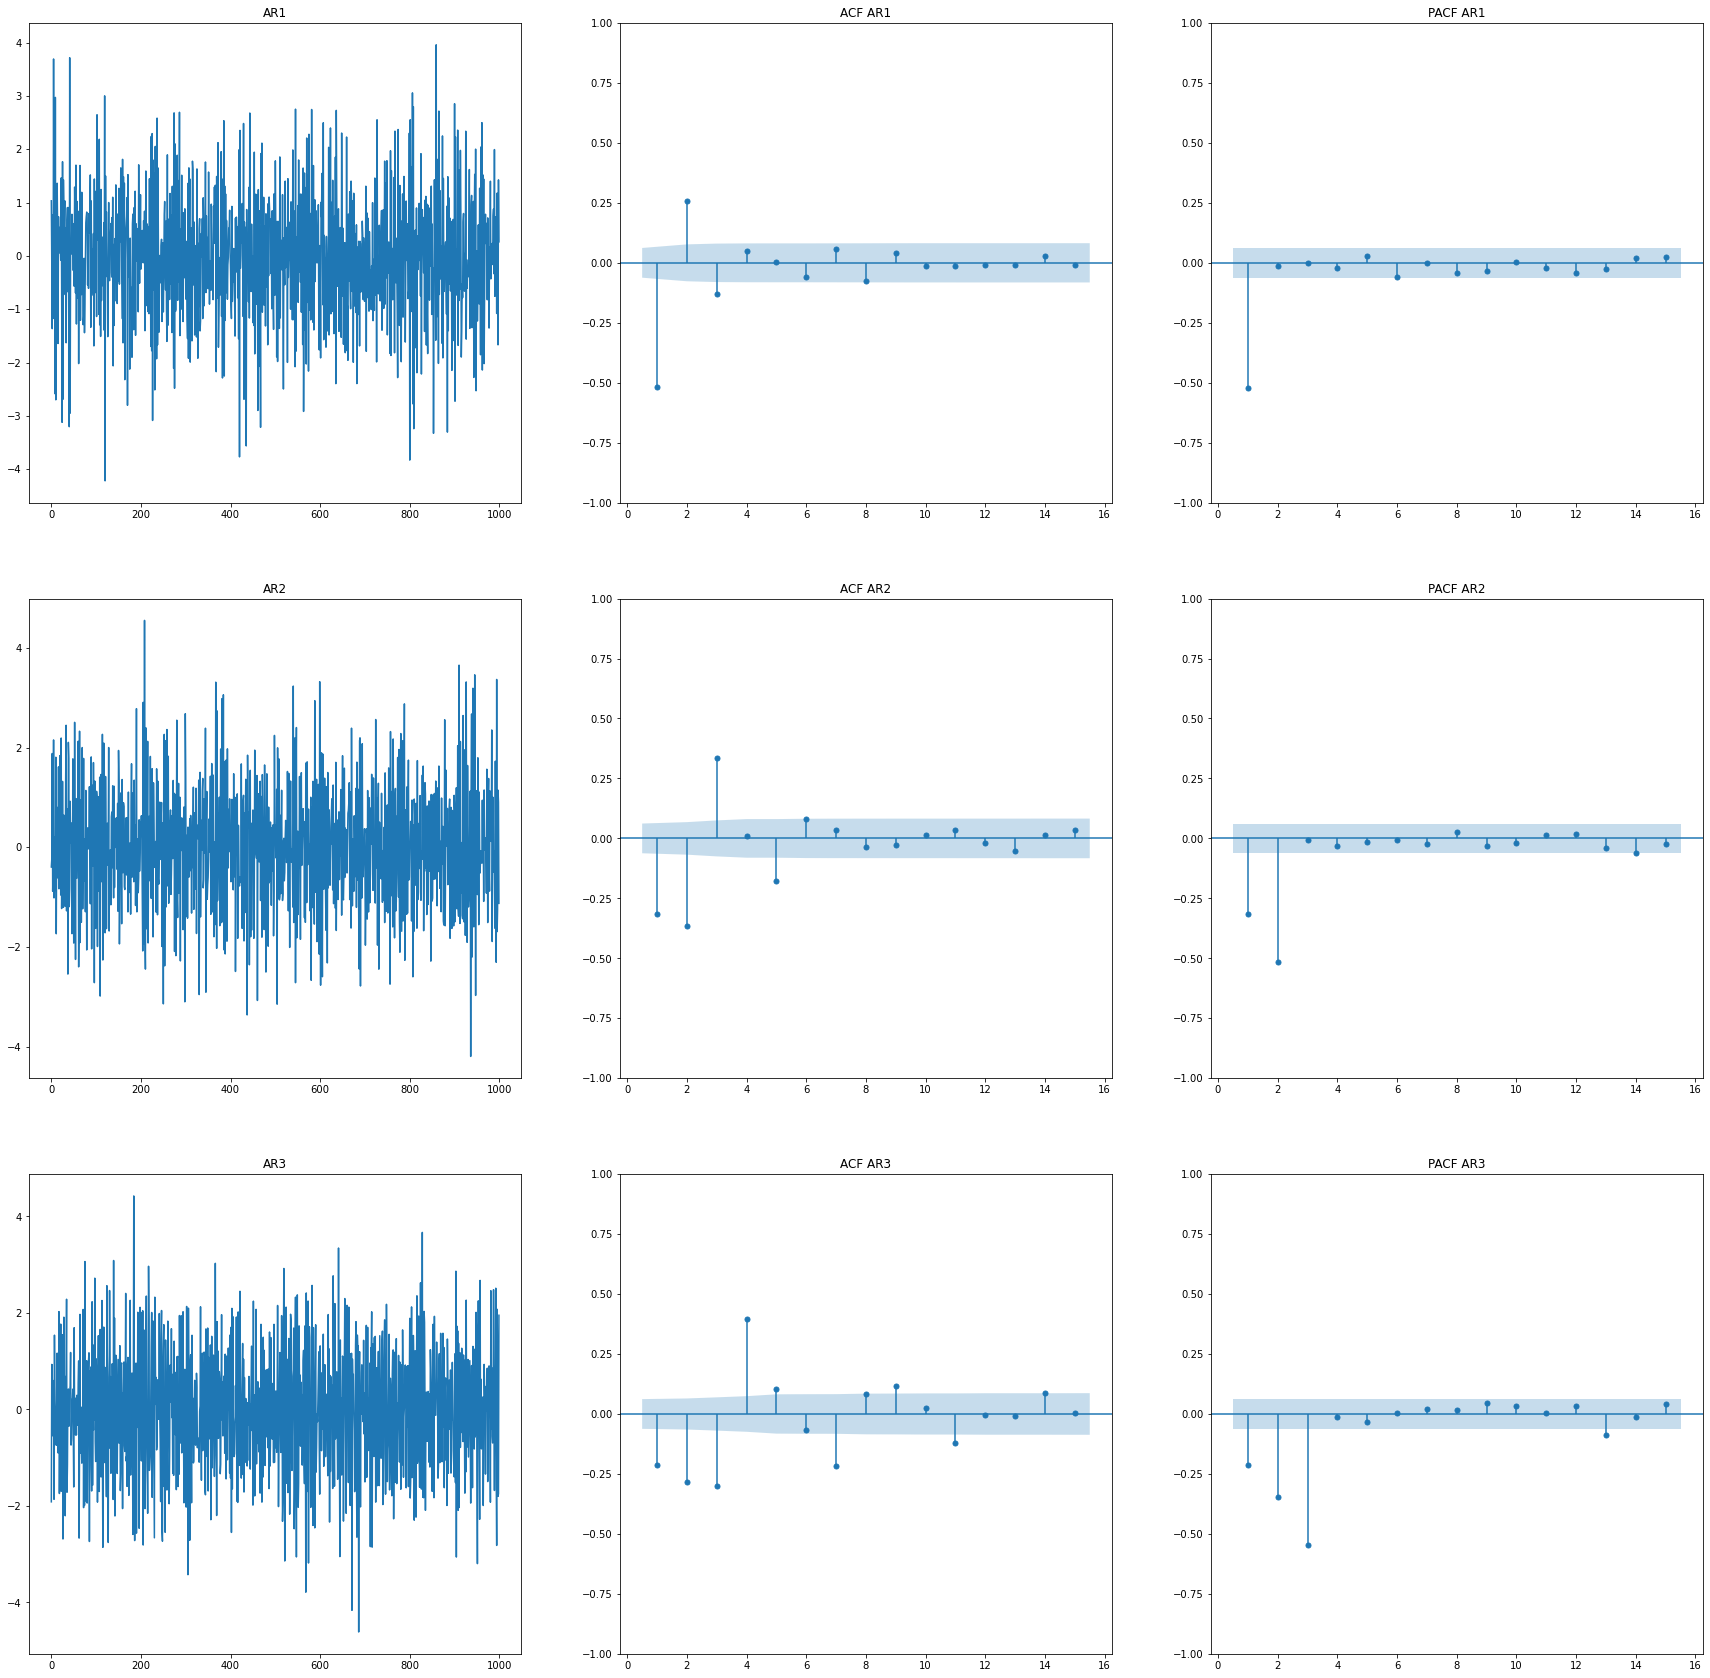

In [165]:
AR1 = sm.tsa.arma_generate_sample(ar=[1,0.5], ma=[1], nsample=1000)
AR2 = sm.tsa.arma_generate_sample(ar=[1,0.5,0.5], ma=[1], nsample=1000)
AR3 = sm.tsa.arma_generate_sample(ar=[1,0.5,0.5,0.5], ma=[1], nsample=1000)
MA1 = sm.tsa.arma_generate_sample(ar=[1], ma=[1,0.5], nsample=1000)
MA2 = sm.tsa.arma_generate_sample(ar=[1], ma=[1,0.5,0.5], nsample=1000)
MA3 = sm.tsa.arma_generate_sample(ar=[1], ma=[1,0.5,0.5,0.5], nsample=1000)

fig, axs = plt.subplots(3, 3, figsize=(30,30))
for i, data in enumerate([AR1, AR2, AR3]):
    axs[i, 0].plot(data)
    sm.graphics.tsa.plot_acf(data, lags=15, zero=False, ax=axs[i, 1])
    sm.graphics.tsa.plot_pacf(data, lags=15, zero=False, ax=axs[i, 2])
    axs[i, 0].set_title(f'AR{i+1}')    
    axs[i, 1].set_title(f'ACF AR{i+1}')
    axs[i, 2].set_title(f'PACF AR{i+1}')




/Users/wangyuanzhe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/wangyuanzhe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/wangyuanzhe/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn

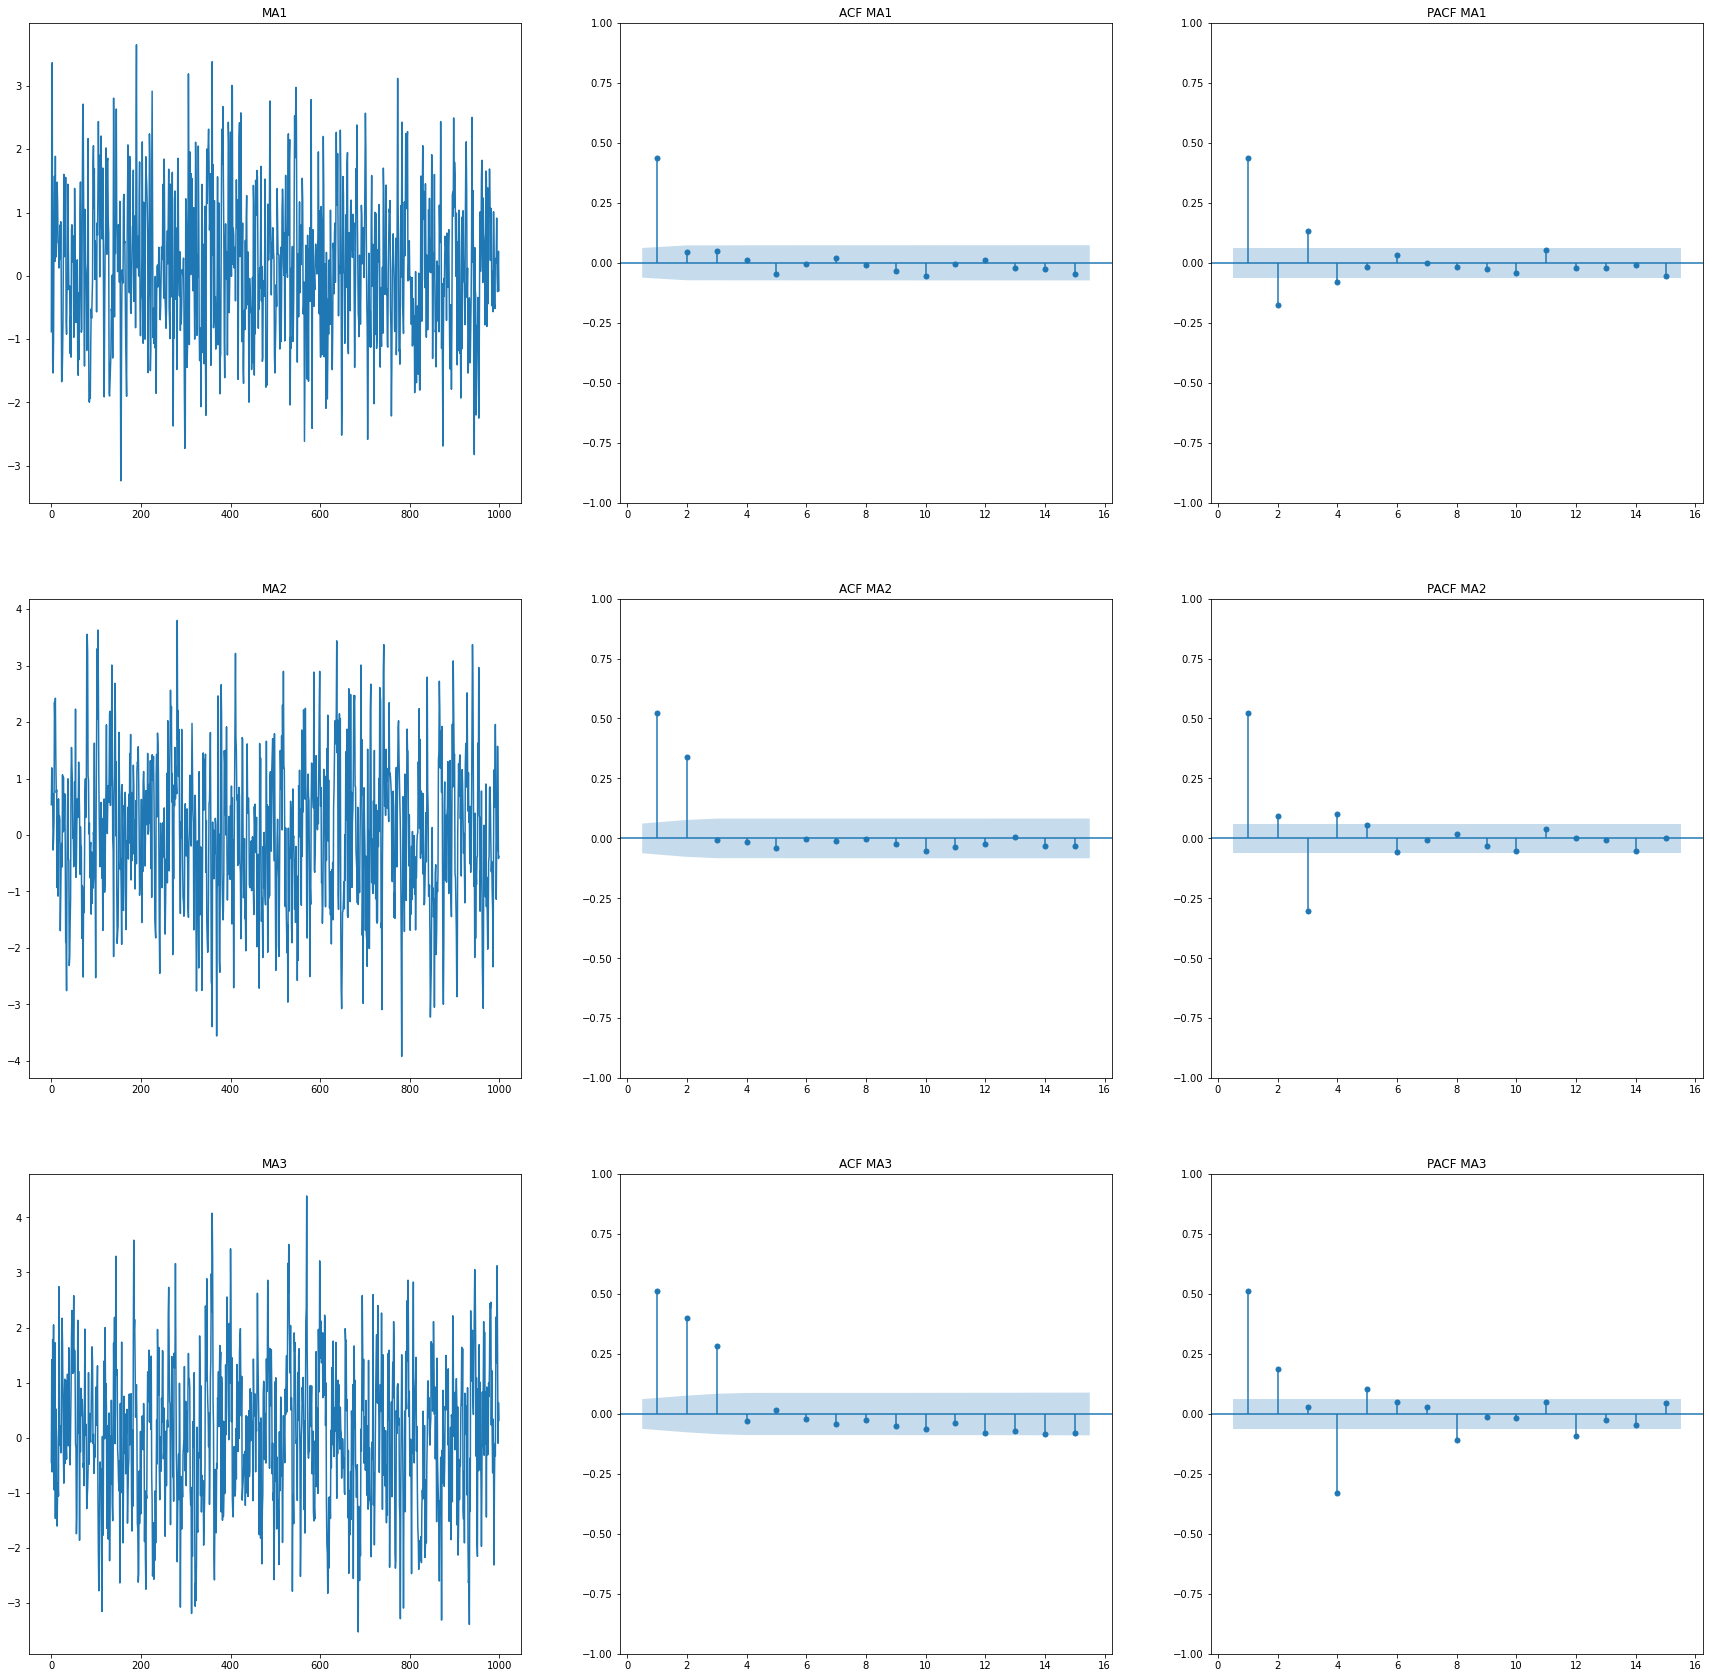

In [166]:
fig, axs = plt.subplots(3, 3, figsize=(30,30))
for i, data in enumerate([MA1, MA2, MA3]):
    axs[i, 0].plot(data)
    sm.graphics.tsa.plot_acf(data, lags=15, zero=False, ax=axs[i, 1])
    sm.graphics.tsa.plot_pacf(data, lags=15, zero=False, ax=axs[i, 2])
    axs[i, 0].set_title(f'MA{i+1}')    
    axs[i, 1].set_title(f'ACF MA{i+1}')
    axs[i, 2].set_title(f'PACF MA{i+1}')